# Attendance Tool

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 1000)

In [2]:
roster = pd.read_csv("blackboard-roster.csv", index_col=False)
roster

,Last Name,First Name,Username,Student ID,Last Access,Availability,Child Course ID
0,Abeles,Marisa,mgabeles,560451202.0,2/25/2021 13:52,Yes,41527.1212
1,Aguilera,Lucas,laaguile,444336572.0,2/24/2021 15:47,Yes,41529.1212
2,Aillon,Cristina,caillon,510056667.0,2/25/2021 10:57,Yes,41525.1212
3,Akerson,William,wgakerso,502743987.0,2/25/2021 10:28,Yes,43177.1212
4,Alhaj,Mohamed,mmalhaj,682205878.0,2/25/2021 23:24,Yes,41550.1212
5,Althour,Ahmed,amalthou,606353459.0,2/25/2021 18:36,Yes,41525.1212
6,Amado,Victoria,vcamado,672122690.0,2/24/2021 15:53,Yes,41525.1212
7,Ambroise,Marie-Elise,mmambroi,990310399.0,2/24/2021 21:37,Yes,41550.1212
8,Anandane,Ismael,ianandan,271428220.0,2/24/2021 17:21,Yes,41564.1212
9,Anderson,Scott,sander05,504473517.0,2/24/2021 13:11,Yes,41556.1212


In [3]:
roster['Name'] = roster['First Name'] + " " + roster['Last Name']

In [4]:
zoom = pd.read_csv("participants_91515764698 (1) (1).csv", index_col=False)
zoom

,Name (Original Name),User Email,Total Duration (Minutes),Guest
0,Michael A Fudge Jr,mafudge@syr.edu,100,No
1,Michael Moriarty,mimoriar@syr.edu,95,No
2,Mohamed Alhaj,mmalhaj@syr.edu,100,No
3,Jake Hyman,jahyman@syr.edu,94,No
4,Austin Rucker,aerucker@syr.edu,94,No
5,Estella Quy,equy01@syr.edu,89,No
6,Derrick Rackie,dprackie@syr.edu,89,No
7,Anthony Thomas,athoma41@syr.edu,84,No
8,Ding Chen,dchen43@syr.edu,90,No
9,Daniel V Smith,dvsmith@syr.edu,95,No


In [5]:
# Use in case of non @syr.edu email addresses
#zoom_temp = zoom['Name (Original Name)'].str.extract(r'^(?P<First>\S+).*?(?P<Last>\S+)?$')
#zoom['Name'] = zoom_temp['First'] + " " + zoom_temp['Last']
#zoom['Name'] = zoom['Name'].str.replace('([()])', '')

In [6]:
zoom_temp = zoom['User Email'].str.split("@")
zoom['Name'] = [i[0] for i in zoom_temp]

In [7]:
attending = []
for name in roster['Username']:
    if name in list(zoom['Name']):
        attending.append(True)
    else:
        attending.append(False)

In [8]:
attendance = pd.DataFrame()
attendance['Name'] = roster['Name']
attendance['Username'] = roster['Username']
attendance['Present'] = attending

In [9]:
polling = pd.read_csv("2021_spring_ist256_m001_mafudge_2021-04-12_15-45-00.csv", index_col=False)
polling

,courseKey,sessionKey,sessionDate,sessionTime,pollNumber,userId,response,dateTimeStamp
0,2021|spring|ist256|m001|mafudge,2021-04-12|15:45:00,2021-04-12,15:45:00,1,rbrosen@syr.edu,C,2021-04-12T20:03:58.1195002+00:00
1,2021|spring|ist256|m001|mafudge,2021-04-12|15:45:00,2021-04-12,15:45:00,1,skim71@syr.edu,D,2021-04-12T20:03:08.6577686+00:00
2,2021|spring|ist256|m001|mafudge,2021-04-12|15:45:00,2021-04-12,15:45:00,1,cohoran@syr.edu,B,2021-04-12T20:03:52.4312522+00:00
3,2021|spring|ist256|m001|mafudge,2021-04-12|15:45:00,2021-04-12,15:45:00,1,efkollin@syr.edu,D,2021-04-12T20:03:22.3281415+00:00
4,2021|spring|ist256|m001|mafudge,2021-04-12|15:45:00,2021-04-12,15:45:00,1,ianandan@syr.edu,B,2021-04-12T20:03:30.6184919+00:00
5,2021|spring|ist256|m001|mafudge,2021-04-12|15:45:00,2021-04-12,15:45:00,1,kjones17@syr.edu,D,2021-04-12T20:03:18.6606728+00:00
6,2021|spring|ist256|m001|mafudge,2021-04-12|15:45:00,2021-04-12,15:45:00,1,mimoriar@syr.edu,A,2021-04-12T20:02:58.9323174+00:00
7,2021|spring|ist256|m001|mafudge,2021-04-12|15:45:00,2021-04-12,15:45:00,1,ojtraino@syr.edu,D,2021-04-12T20:03:41.9938841+00:00
8,2021|spring|ist256|m001|mafudge,2021-04-12|15:45:00,2021-04-12,15:45:00,1,etsulliv@syr.edu,D,2021-04-12T20:03:26.9515775+00:00
9,2021|spring|ist256|m001|mafudge,2021-04-12|15:45:00,2021-04-12,15:45:00,1,ascollad@syr.edu,B,2021-04-12T20:03:46.0802451+00:00


In [10]:
poll_temp = polling['userId'].str.split("@")
polling['userId'] = [i[0] for i in poll_temp]

In [11]:
participants = pd.DataFrame(polling.groupby(['userId'], as_index=False)['response'].count())
participants['>=50%'] = participants['response'] >= participants['response'].max()/2 

In [12]:
import numpy as np
merged = attendance.merge(participants, how='outer', left_on='Username', right_on='userId')
merged['Response'] = merged['response']
merged.loc[np.isnan(merged.Response),'Response']=0.0
merged.loc[(merged.Response == 0.0),'>=50%']=False
merged = merged.drop(columns=['userId', 'response'])
merged

,Name,Username,Present,>=50%,Response
0,Marisa Abeles,mgabeles,True,True,7.0
1,Lucas Aguilera,laaguile,True,True,7.0
2,Cristina Aillon,caillon,True,False,3.0
3,William Akerson,wgakerso,True,True,7.0
4,Mohamed Alhaj,mmalhaj,True,True,7.0
5,Ahmed Althour,amalthou,True,False,1.0
6,Victoria Amado,vcamado,True,True,7.0
7,Marie-Elise Ambroise,mmambroi,True,True,4.0
8,Ismael Anandane,ianandan,True,True,6.0
9,Scott Anderson,sander05,True,False,0.0


In [13]:
#import numpy as np
#if np.isnan(merged['Response'][9]):
#    print(True)

In [14]:
good_participation = merged['>=50%'].value_counts()
good_attendance = merged['Present'].value_counts()
response = merged['Response'].value_counts()

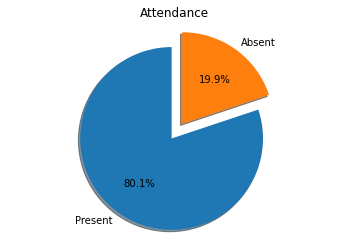

In [15]:
import matplotlib.pyplot as plt

labels = 'Present', 'Absent'
sizes = good_attendance
explode = (0.1, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Attendance')

plt.show()

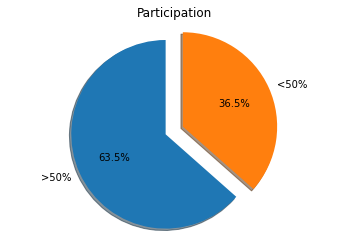

In [16]:
labels = '>50%', '<50%'
sizes = good_participation
explode = (0.1, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Participation')

plt.show()

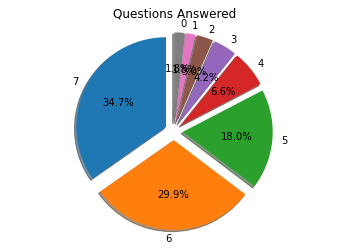

In [17]:
labels = '7', '6', '5', '4', '3', '2', '1', '0'
sizes = response
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Questions Answered')

plt.show()

In [18]:
def attendance(blackboard_roster, zoom_participants, poll_participants):
    roster = pd.read_csv(blackboard_roster, index_col=False)
    roster['Name'] = roster['First Name'] + " " + roster['Last Name']
 
    zoom = pd.read_csv(zoom_participants, index_col=False)
    
    # Use in case of non @syr.edu email addresses
    #zoom_temp = zoom['Name (Original Name)'].str.extract(r'^(?P<First>\S+).*?(?P<Last>\S+)?$')
    #zoom['Name'] = zoom_temp['First'] + " " + zoom_temp['Last']
    #zoom['Name'] = zoom['Name'].str.replace('([()])', '')
    
    zoom_temp = zoom['User Email'].str.split("@")
    zoom['Name'] = [i[0] for i in zoom_temp]
    
    attending = []
    for name in roster['Name']:
        if name in list(zoom['Name']):
            attending.append(True)
        else:
            attending.append(False)
            
    attendance = pd.DataFrame()
    attendance['Name'] = roster['Name']
    attendance['Username'] = roster['Username']
    attendance['Present'] = attending
    
    polling = pd.read_csv(poll_participants, index_col=False)
    poll_temp = polling['userId'].str.split("@")
    polling['userId'] = [i[0] for i in poll_temp]
    
    participants = pd.DataFrame(polling.groupby(['userId'], as_index=False)['response'].count())
    participants['>=50%'] = participants['response'] >= participants['response'].max()/2 
    
    merged = attendance.merge(participants, how='outer', left_on='Username', right_on='userId')
    merged['Response'] = merged['response']
    merged.loc[np.isnan(merged.Response),'Response']=0.0
    merged.loc[(merged.Response == 0.0),'>=50%']=False
    merged = merged.drop(columns=['userId', 'response'])
    
    return merged

In [19]:
attendance("blackboard-roster.csv", "participants_91515764698 (1) (1).csv", "2021_spring_ist256_m001_mafudge_2021-04-12_15-45-00.csv")

,Name,Username,Present,>=50%,Response
0,Marisa Abeles,mgabeles,False,True,7.0
1,Lucas Aguilera,laaguile,False,True,7.0
2,Cristina Aillon,caillon,False,False,3.0
3,William Akerson,wgakerso,False,True,7.0
4,Mohamed Alhaj,mmalhaj,False,True,7.0
5,Ahmed Althour,amalthou,False,False,1.0
6,Victoria Amado,vcamado,False,True,7.0
7,Marie-Elise Ambroise,mmambroi,False,True,4.0
8,Ismael Anandane,ianandan,False,True,6.0
9,Scott Anderson,sander05,False,False,0.0


In [20]:
#merged.to_csv('attendance_2021_4_12.csv')